# 2. Minimum example

This notebook shows the minimum code of the whole workflow.
It is the essential version of [1. Basic Usage](./1_basic.ipynb).
I think this is not practical because if you just want clean, you can use real data set and softwares like CASA.
Nevertheless, it may be useful to overview the whole part of this simulator.

In [1]:
import sys
import matplotlib.pyplot as plt
import cv2 as cv
sys.path.append('..')
from CLEAN import CLEAN

Using NumPy in the CLEAN module. This may worsen the performance. If you encounter bad performance, consider using CuPy.


In [2]:
clean = CLEAN()  # CLEAN class
imagefile = '../image/structure.png'  # true target image
maskfile = '../image/structure_mask.png'  # mask image
N_antennas = 20  # number of antennas

In [3]:
antenna_pos, uv_coverage = clean.set_antenna_array(geometry='random', n_antennas=N_antennas, b_min=0.01)
vis, imsize = clean.create_visibility(imagefile=imagefile)

PSF created.


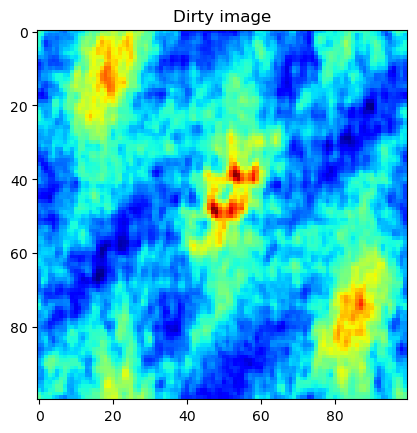

In [4]:
# Dirty image
_, _, _, dirty_image = clean.clean(vis=vis, imsize=imsize, weighting='uniform', n_iter=0, threshold=1e-10, mask=maskfile)

fig, ax = plt.subplots()
im = ax.imshow(dirty_image, cmap='jet')
ax.set_title('Dirty image')
plt.show()

PSF created.
Maximum number of iterations 10000 reached.


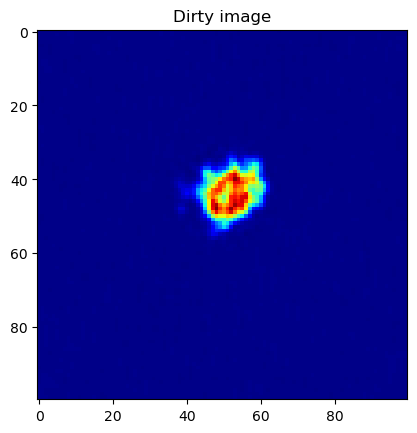

PSF created.
Maximum number of iterations 10000 reached.


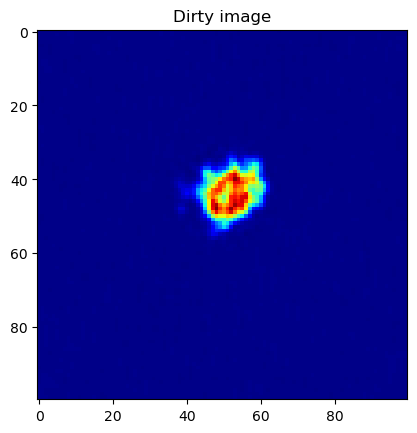

PSF created.
Maximum number of iterations 10000 reached.


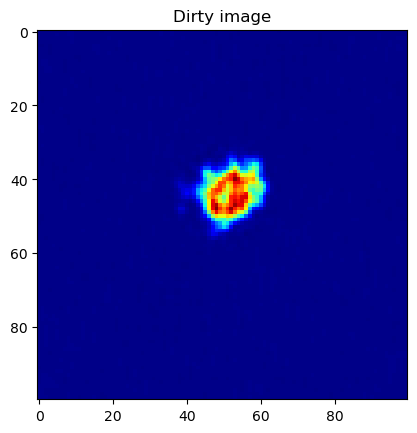

PSF created.
Maximum number of iterations 10000 reached.


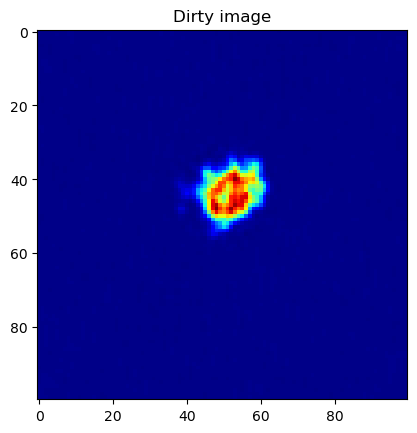

PSF created.
Maximum number of iterations 10000 reached.


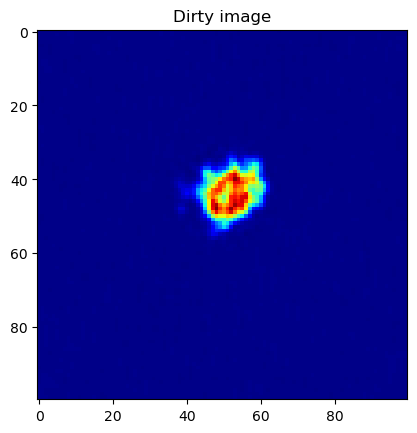

PSF created.
Maximum number of iterations 10000 reached.


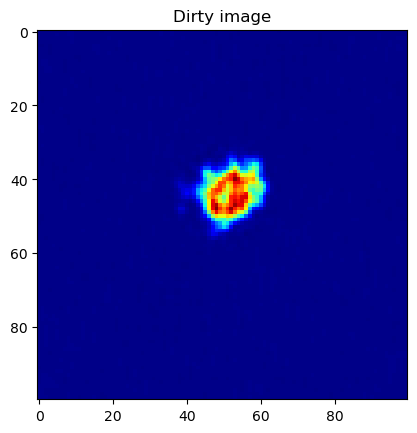

PSF created.
Maximum number of iterations 10000 reached.


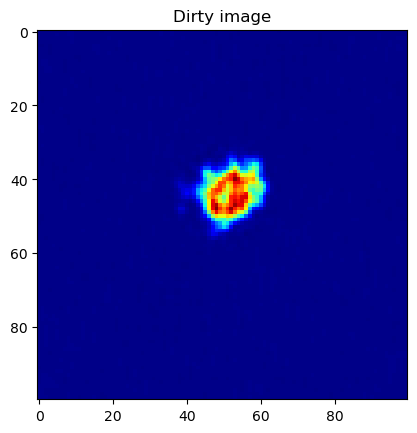

PSF created.
Maximum number of iterations 10000 reached.


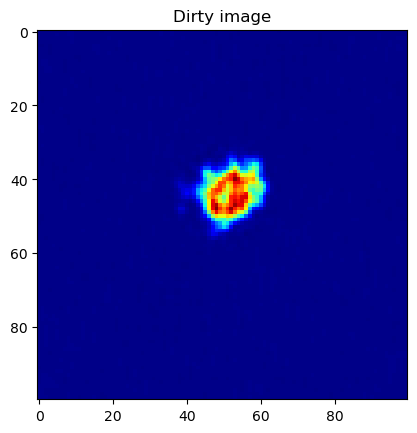

300 ms ± 1.86 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
%%timeit
# Clean
threshold = 1e-10
n_iter = 10000
_, _, _, clean_image = clean.clean(vis=vis, imsize=imsize, weighting='uniform', n_iter=n_iter, threshold=threshold, mask=maskfile, gamma=0.2)

fig, ax = plt.subplots()
im = ax.imshow(clean_image, cmap='jet')
ax.set_title('Dirty image')
plt.show()